In [28]:
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'mathtext.default':  'regular' })
from matplotlib.ticker import MultipleLocator
import json
import pandas as pd
from pathlib import Path

In [29]:
embodied_carbon = 26356.568
device_life_years = 5
embodied_carbon_per_sec=embodied_carbon / device_life_years / 365 / 24 / 3600
# carbon_per_req = self.energy_per_lvl[co2opt_lvl] * ci + self.embodied_carbon_per_sec * self.time_per_lvl[co2opt_lvl]

# Resolution

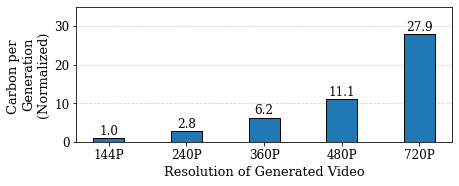

In [30]:
steps = 100
frames = 16
batch = 1

resolutions = {"144P": (144, 256), 
               "240P": (240, 426), 
               "360P": (360, 640),
               "480P": (480, 854),
               "720P": (720, 1280),}

y = []
for k, v in resolutions.items():
    with open(f"../data/char_sample_1/batch_{batch}_steps_{steps}_frames_{frames}_reso_{v[0]}x{v[1]}.json.json") as f:
        data = json.load(f)
    total_co2 = np.mean(data["co2"]) + embodied_carbon_per_sec * np.mean(data["time"])
    y.append(total_co2)

# normalize y to y[0]
y = np.array(y) / y[0]

fig, axs = plt.subplots(nrows=1, ncols=1, gridspec_kw={'hspace': 0.4, 'wspace': 0.4, 'bottom': 0.2, 
                    'top': 0.95, 'right':0.995, 'left':0.25}, figsize=(7,2.5))
bars = axs.bar(list(resolutions.keys()), y, width=0.4, zorder=3, edgecolor='black')
# show values on top of bars
for bar in bars:
    yval = bar.get_height()
    axs.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f"{round(yval, 1)}", ha='center', va='bottom', fontsize=12)
axs.grid(which='both', axis='y', color='lightgrey', ls='dashed', zorder=0)
axs.set_ylim(0, 35)
axs.tick_params(axis='both', which='major', labelsize=12)
axs.set_ylabel("Carbon per \nGeneration\n(Normalized)", fontsize=13)
axs.set_xlabel("Resolution of Generated Video", fontsize=13)
plt.savefig(f"figures/fig1_resolution.pdf", bbox_inches='tight')